In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.xls
/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

In [4]:
coffee.head(10)

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Albania,1965,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Albania,1966,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Albania,1967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Albania,1968,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Albania,1969,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 6016 non-null   object
 1   Year                    6016 non-null   int64 
 2   Arabica Production      6016 non-null   int64 
 3   Bean Exports            6016 non-null   int64 
 4   Bean Imports            6016 non-null   int64 
 5   Beginning Stocks        6016 non-null   int64 
 6   Domestic Consumption    6016 non-null   int64 
 7   Ending Stocks           6016 non-null   int64 
 8   Exports                 6016 non-null   int64 
 9   Imports                 6016 non-null   int64 
 10  Other Production        6016 non-null   int64 
 11  Production              6016 non-null   int64 
 12  Roast & Ground Exports  6016 non-null   int64 
 13  Roast & Ground Imports  6016 non-null   int64 
 14  Robusta Production      6016 non-null   int64 
 15  Rst,

In [6]:
# Data Cleaning

In [7]:
# get the number of missing data points per column
missing_values_count = coffee.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]


Country                 0
Year                    0
Arabica Production      0
Bean Exports            0
Bean Imports            0
Beginning Stocks        0
Domestic Consumption    0
Ending Stocks           0
Exports                 0
Imports                 0
dtype: int64

In [10]:
# Check for negative values

negative_values_check = (coffee.select_dtypes(include=['int64', 'float64']) < 0).any()

In [11]:
negative_values_check

Year                      False
Arabica Production        False
Bean Exports              False
Bean Imports              False
Beginning Stocks          False
Domestic Consumption      False
Ending Stocks             False
Exports                   False
Imports                   False
Other Production          False
Production                False
Roast & Ground Exports    False
Roast & Ground Imports    False
Robusta Production        False
Rst,Ground Dom. Consum    False
Soluble Dom. Cons.        False
Soluble Exports           False
Soluble Imports           False
Total Distribution        False
Total Supply              False
dtype: bool

In [21]:
coffee.describe()

,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.00000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,1991.500000,744.343251,814.576130,372.732547,457.242686,673.035239,449.392287,895.636968,430.320479,2.21127,1130.501164,13.163065,10.648105,383.946642,588.521443,84.513797,67.897773,46.054355,2018.064495,2018.064328
std,18.474489,3349.259676,2897.359439,3052.833589,3116.051164,3309.043485,3039.644305,3166.527239,3109.893157,20.44888,4433.006465,122.365592,61.176816,1929.120607,3136.536532,377.995317,347.229671,299.676010,7468.535501,7468.535544
min,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1991.500000,0.000000,4.000000,0.000000,0.000000,14.000000,0.000000,9.000000,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,112.000000,112.000000
75%,2007.250000,200.000000,325.000000,0.000000,83.000000,227.000000,81.000000,439.000000,2.000000,0.00000,575.000000,0.000000,0.000000,27.000000,188.250000,1.000000,0.000000,0.000000,1105.250000,1105.250000
max,2023.000000,49700.000000,41689.000000,47000.000000,72461.000000,49070.000000,72461.000000,45675.000000,47000.000000,375.00000,69900.000000,2975.000000,1060.000000,30480.000000,47010.000000,6745.000000,4300.000000,6000.000000,97806.000000,97806.000000


In [22]:
# Using value_counts() on the 'Year' column
year_counts = coffee['Year'].value_counts()

# Displaying the counts
print(year_counts)

Year
1960    94
1961    94
1994    94
1995    94
1996    94
        ..
1986    94
1987    94
1988    94
1989    94
2023    94
Name: count, Length: 64, dtype: int64


In [27]:
# Using value_counts() on the 'Country' column
country_counts = coffee['Country'].value_counts()

# Displaying the counts
print(country_counts)

Country
Albania              64
Nigeria              64
Rwanda               64
Russia               64
Philippines          64
                     ..
European Union       64
Ethiopia             64
Equatorial Guinea    64
El Salvador          64
Zimbabwe             64
Name: count, Length: 94, dtype: int64


In [30]:
# Using value_counts() on the 'Imports' column
import_counts = coffee['Imports'].value_counts()

# Displaying the counts
print(import_counts)

Imports
0      4434
1        48
5        46
2        41
25       27
       ... 
335       1
34        1
52        1
61        1
720       1
Name: count, Length: 627, dtype: int64


In [29]:
# Using value_counts() on the 'Total Supply' column
total_supply_counts = coffee['Total Supply'].value_counts()

# Displaying the counts
print(total_supply_counts)

Total Supply
0       1942
5         45
100       34
3         32
10        30
        ... 
3288       1
3402       1
3019       1
2683       1
272        1
Name: count, Length: 2065, dtype: int64


In [28]:
# Using value_counts() on the 'Total Distribution' column
total_distribution_counts = coffee['Total Distribution'].value_counts()

# Displaying the counts
print(total_distribution_counts)

Total Distribution
0       1942
5         45
100       34
3         32
10        30
        ... 
3288       1
3402       1
3019       1
2683       1
272        1
Name: count, Length: 2065, dtype: int64


In [23]:
# Verify the column names, especially for the date column
print(coffee.columns)

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')


In [13]:
# Data Visualization

In [16]:
# Global coffee production trends over the years.

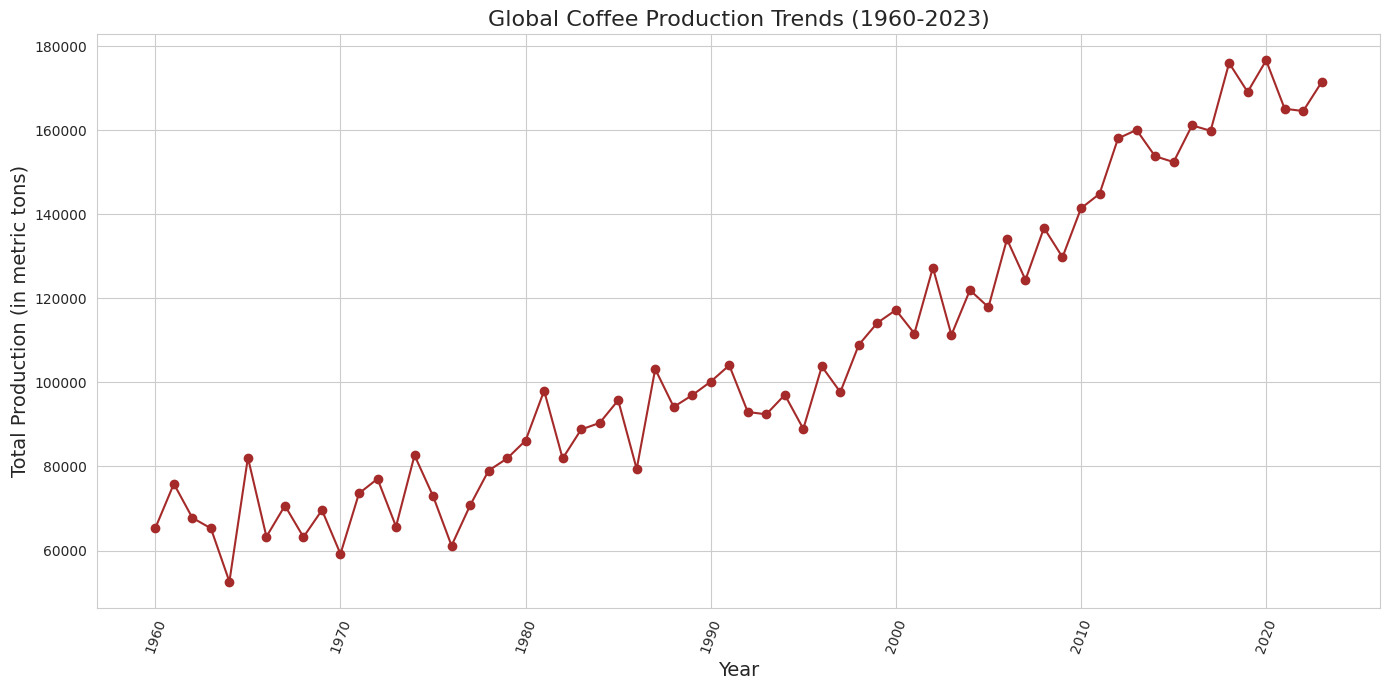

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Global coffee production trends over the years
plt.figure(figsize=(14, 7))
coffee.groupby('Year')['Production'].sum().plot(kind='line', color='brown', marker='o')
plt.title('Global Coffee Production Trends (1960-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Production (in metric tons)', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# Top coffee-producing countries.

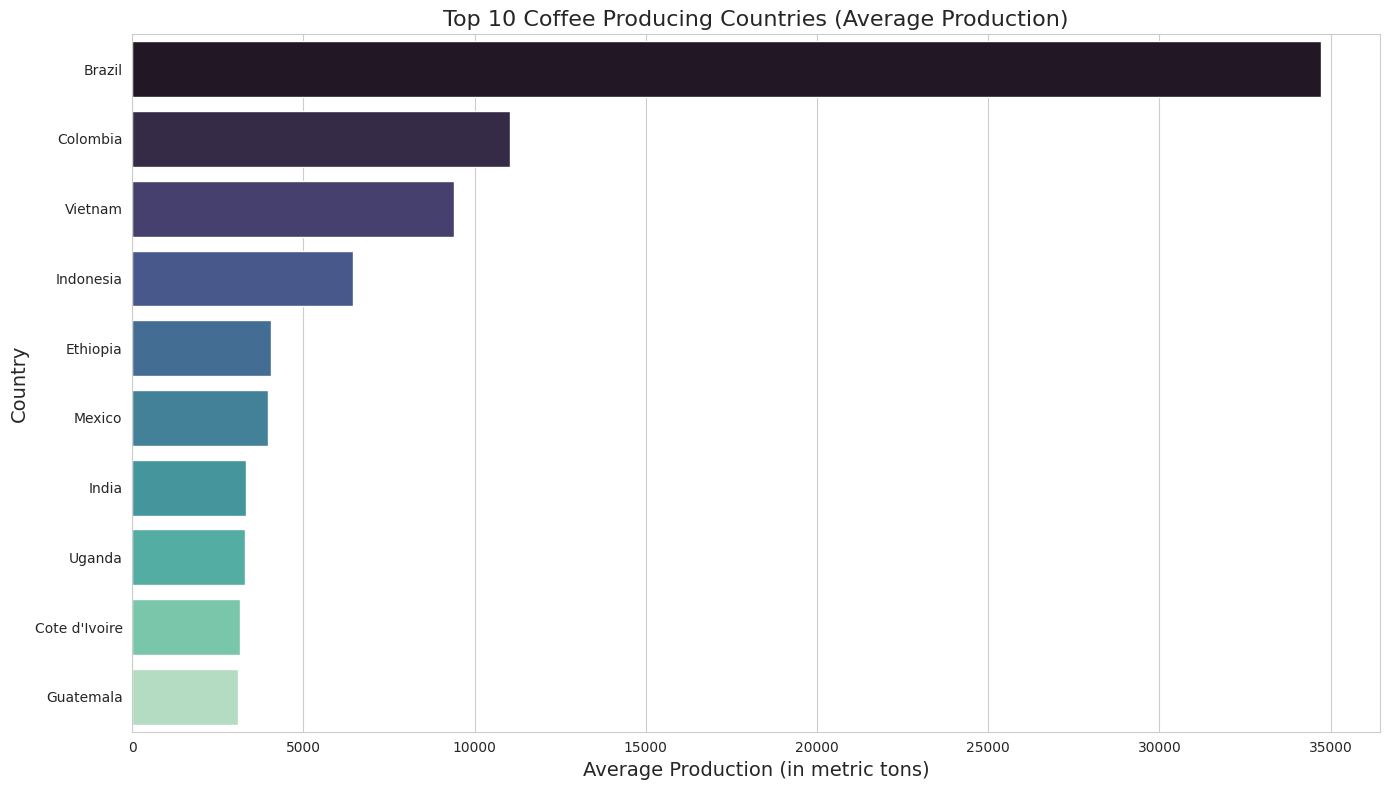

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Top coffee-producing countries
top_producers = coffee.groupby('Country')['Production'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_producers.values, y=top_producers.index, palette="mako")
plt.title('Top 10 Coffee Producing Countries (Average Production)', fontsize=16)
plt.xlabel('Average Production (in metric tons)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Domestic consumption trends in key coffee-consuming countries.

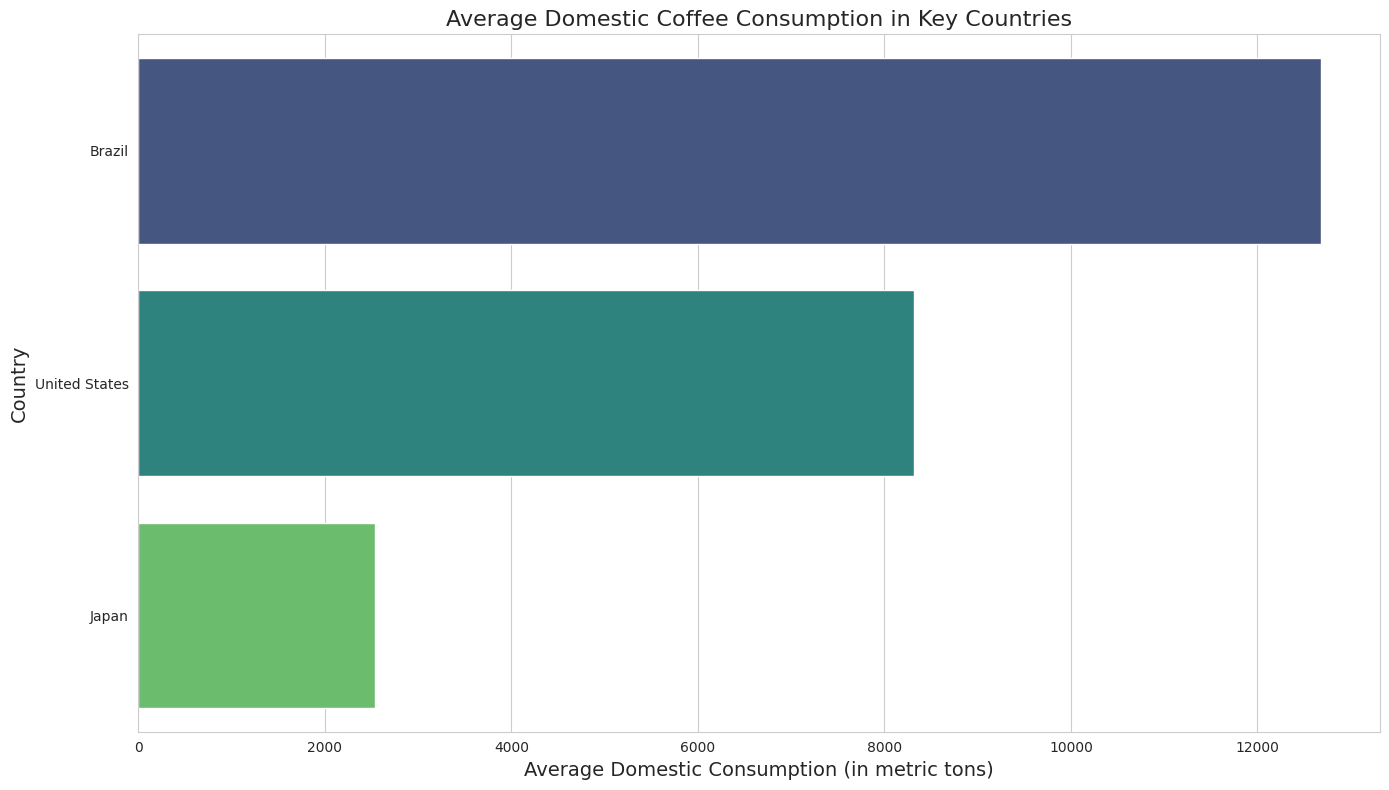

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Selecting key coffee-consuming countries for analysis
key_countries = ['United States', 'Brazil', 'Germany', 'Japan', 'France']

# Filtering data for these countries
consumption_data = coffee[coffee['Country'].isin(key_countries)]

# Aggregating average domestic consumption for each country

avg_consumption_data = consumption_data.groupby('Country')['Domestic Consumption'].mean().reset_index()

# Sorting the data for better visualization
avg_consumption_data_sorted = avg_consumption_data.sort_values(by='Domestic Consumption', ascending=False)

# Plotting bar graph for average domestic consumption
plt.figure(figsize=(14, 8))
sns.barplot(x='Domestic Consumption', y='Country', data=avg_consumption_data_sorted, palette="viridis")
plt.title('Average Domestic Coffee Consumption in Key Countries', fontsize=16)
plt.xlabel('Average Domestic Consumption (in metric tons)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Global Trend for Coffee Imports Over the Years

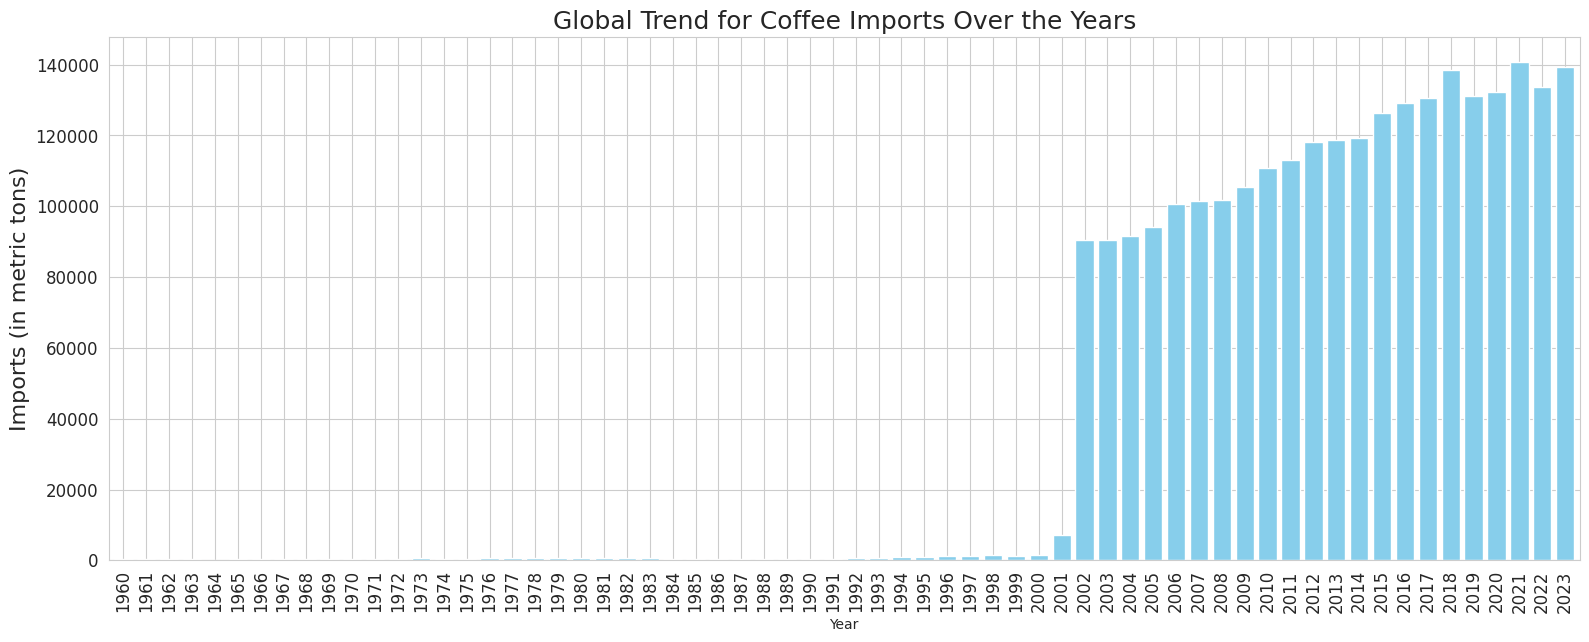

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Adjusting the size, layout, and x-ticks for better readability
plt.figure(figsize=(16, 18))

# Global Trend for Coffee Imports Over the Years
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
coffee.groupby('Year')['Imports'].sum().plot(kind='bar', color='skyblue', width=0.8)
plt.title('Global Trend for Coffee Imports Over the Years', fontsize=18)
plt.ylabel('Imports (in metric tons)', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

This chart highlights the volume of coffee imports globally, showcasing fluctuations and trends in import demand.

In [ ]:
# The total distribution of coffee

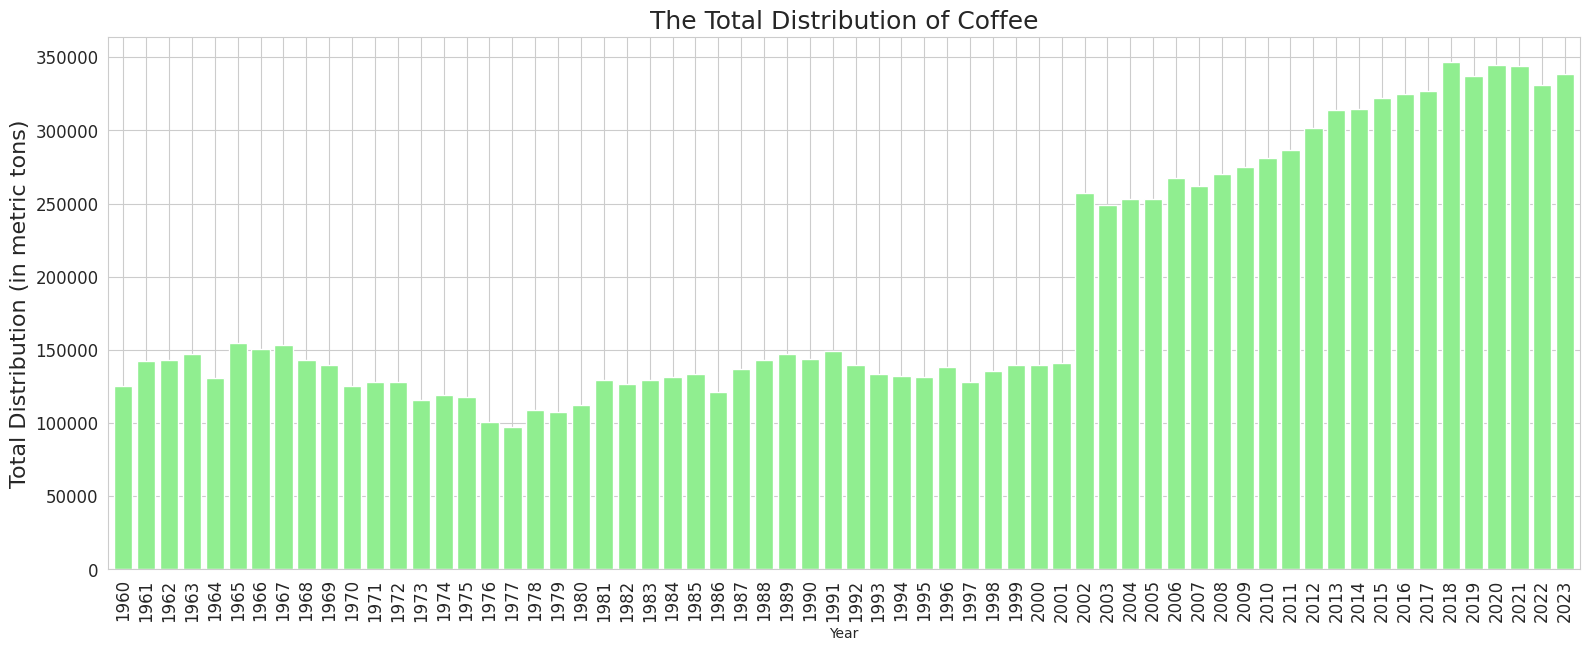

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Adjusting the size, layout, and x-ticks for better readability
plt.figure(figsize=(16, 18))

# The Total Distribution of Coffee
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
coffee.groupby('Year')['Total Distribution'].sum().plot(kind='bar', color='lightgreen', width=0.8)
plt.title('The Total Distribution of Coffee', fontsize=18)
plt.ylabel('Total Distribution (in metric tons)', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

This visualization provides insights into the total distribution of coffee, reflecting how coffee is allocated through consumption, exports, and stock adjustments.

In [ ]:
# The total supply of coffee globally

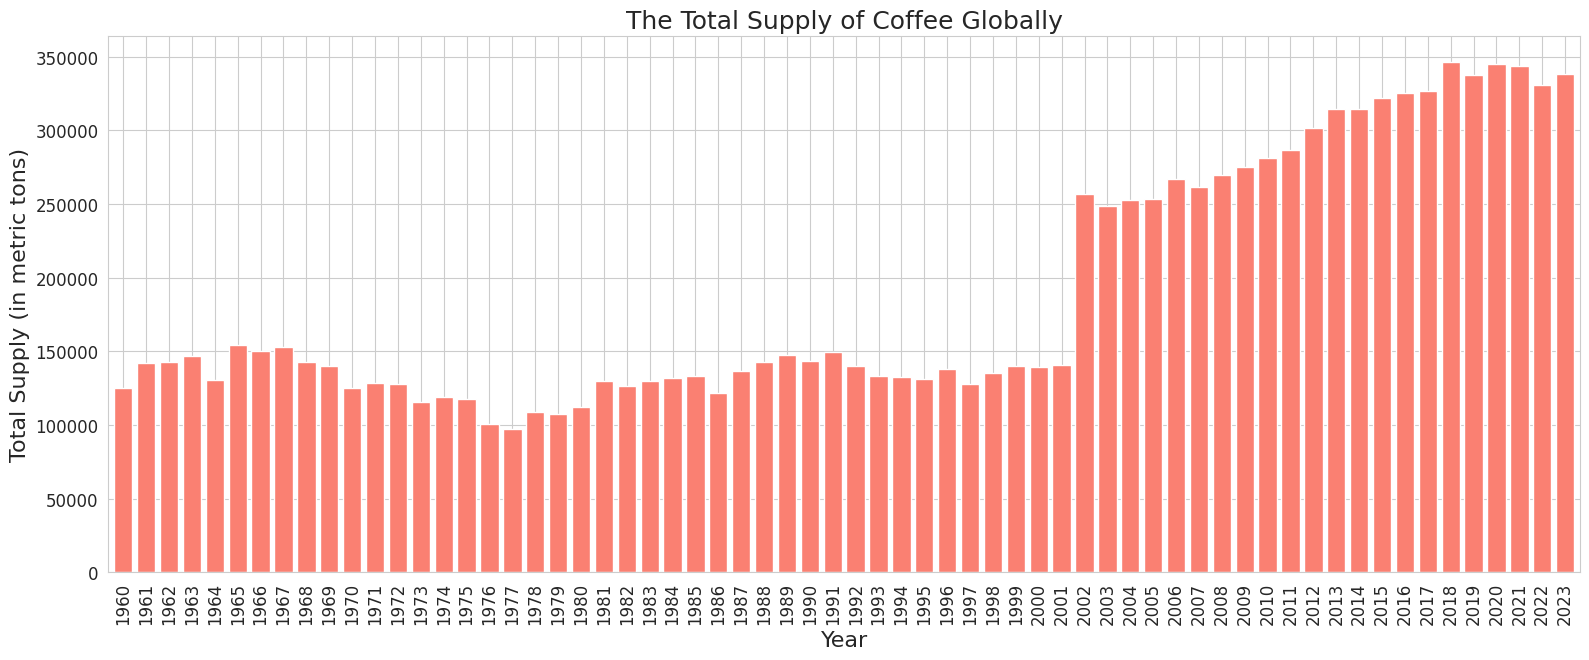

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee = pd.read_csv('/kaggle/input/coffee-distribution-across-94-counties/psd_coffee.csv')

# Adjusting the size, layout, and x-ticks for better readability
plt.figure(figsize=(16, 18))

# The Total Supply of Coffee Globally
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
coffee.groupby('Year')['Total Supply'].sum().plot(kind='bar', color='salmon', width=0.8)
plt.title('The Total Supply of Coffee Globally', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Supply (in metric tons)', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

The final chart depicts the total supply of coffee worldwide, incorporating production, imports, and changes in stocks, to give a comprehensive view of coffee availability.